# 双向循环神经网络
模型的实现架构可以参考如下：

![Alt text](image-12.png)

其中包括了两个隐藏层。这两个隐藏层的更新刚好是相反方向的。

两组隐藏层的更新参考下方的公式，总的隐藏层是两个方向的隐藏层做一次`concat`的结果。

![Alt text](image-13.png)

目的是用于文本的抽取和填空。

## 下面是一个错误样例 不能用双向循环神经网络实现未来预测

KeyboardInterrupt: 

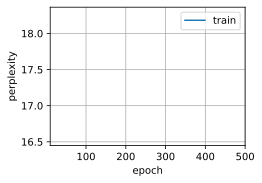

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

# 加载数据
batch_size, num_steps, device = 32, 35, d2l.try_gpu()
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)
# 通过设置“bidirective=True”来定义双向LSTM模型
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
num_inputs = vocab_size
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers, bidirectional=True) # 使用双向
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)
# 训练模型
num_epochs, lr = 500, 1
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)